In [ ]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df_adverse= pd.read_csv('merged_adverse_events.csv') #reading the merged csv files

In [ ]:
df_adverse.shape

(23610, 13)

In [ ]:
df_adverse.head(5)

,Report Number,Event Date,Event Type,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Exemption Number,Number of Events,Event Text
0,8030229-2022-03110,2022-09-06 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-28 04:00:00,DRT,ZM-531PA,Communication or Transmission Problem,"No Clinical Signs, Symptoms or Conditions",K043517,NaN,1,NaN
1,8030229-2022-03068,2022-08-10 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-09 04:00:00,DRT,ZM-531PA,Output Problem,"No Clinical Signs, Symptoms or Conditions",K043517,NaN,1,NaN
2,8030229-2022-03055,2022-08-10 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-08 04:00:00,DRT,GZ-130PA,Communication or Transmission Problem,"No Clinical Signs, Symptoms or Conditions",K153707,NaN,1,NaN
3,8030229-2022-03054,2022-08-09 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-07 04:00:00,DRT,GZ-130PA,Communication or Transmission Problem; Interm...,"No Clinical Signs, Symptoms or Conditions",K153707,NaN,1,NaN
4,8030229-2022-03089,2022-08-08 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-07 04:00:00,DRT,GZ-130PA,Output Problem,"No Clinical Signs, Symptoms or Conditions",K153707,NaN,1,NaN


In [ ]:
df_adverse['Event Type'].unique() #checking the uniques files in the event_type

array(['Malfunction', 'Injury', 'Death', nan, 'Other'], dtype=object)

In [ ]:
df_adverse.columns #these are the columns we have in our final dataset

Index(['Report Number', 'Event Date', 'Event Type', 'Manufacturer',
       'Date Received', 'Product Code', ' Brand Name', ' Device Problem',
       'Patient Problem', 'PMA/PMN Number', 'Exemption Number',
       'Number of Events', 'Event Text'],
      dtype='object')

In [ ]:
df_adverse.isna().sum()

Report Number           0
Event Date           2857
Event Type             43
Manufacturer           24
Date Received           0
Product Code            0
 Brand Name             0
 Device Problem         0
Patient Problem         4
PMA/PMN Number       6372
Exemption Number    23610
Number of Events        0
Event Text           9320
dtype: int64

In [ ]:
df_adverse.isna().sum().sort_values(ascending=False)/len(df_adverse) #we don't have any values for Exemption Number in our dataset

Exemption Number    1.000000
Event Text          0.394748
PMA/PMN Number      0.269886
Event Date          0.121008
Event Type          0.001821
Manufacturer        0.001017
Patient Problem     0.000169
Report Number       0.000000
Date Received       0.000000
Product Code        0.000000
 Brand Name         0.000000
 Device Problem     0.000000
Number of Events    0.000000
dtype: float64

In [ ]:
df_adverse.drop('Exemption Number',axis=1,inplace=True)  #dropped exemptiom number 

In [ ]:
df_adverse.isna().sum().sort_values(ascending=False)/len(df_adverse) *100 # these are percentage of missing values for every feature

Event Text          39.474799
PMA/PMN Number      26.988564
Event Date          12.100805
Event Type           0.182126
Manufacturer         0.101652
Patient Problem      0.016942
Report Number        0.000000
Date Received        0.000000
Product Code         0.000000
 Brand Name          0.000000
 Device Problem      0.000000
Number of Events     0.000000
dtype: float64

## Grouping columns for Analysis

In [ ]:
adverse_group=df_adverse.groupby(['Product Code','Event Type']).sum().reset_index() 

In [ ]:
adverse_group.columns

Index(['Product Code', 'Event Type', 'Number of Events'], dtype='object')

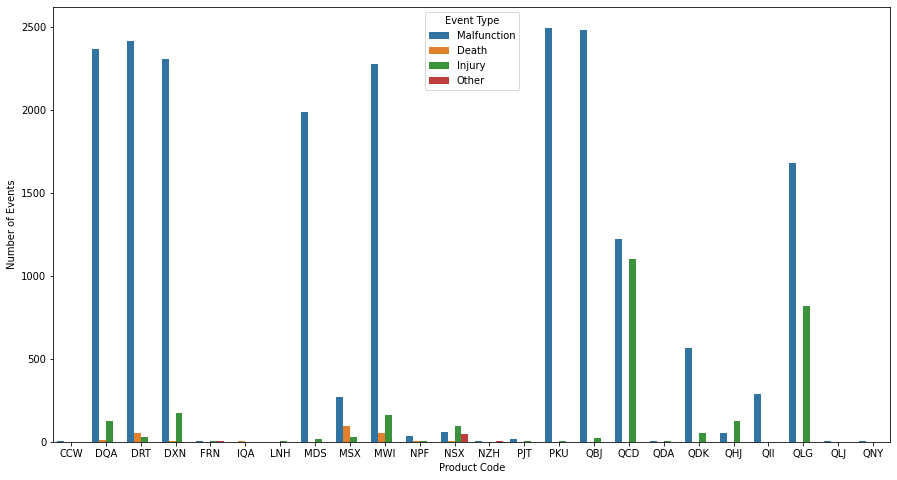

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x ="Product Code", y = "Number of Events", hue = "Event Type", data = adverse_group)
plt.show()

As we can see event types with all products 

In [ ]:
adverse_group_pc_m=df_adverse.groupby(['Product Code','Manufacturer']).sum()
adverse_group_pc_m

Number of Events
Product Code Manufacturer                               
BSZ          GE HEALTHCARE                             2
CCW          AMBU, INC.                                5
DQA          CAREFUSION SD                           515
             COVIDIEN AG NELLCOR                      10
             COVIDIEN LP                               5
...                                                  ...
QII          DEXCOM, INC.                            284
             DEXCOM, INC.                              2
QLG          ABBOTT DIABETES CARE INC               2320
             ABBOTT DIABETES CARE INC.                 5
             ABBOTT DIABETES CARE LTD                175

[258 rows x 1 columns]

 We group by product code with manufacturer to check the number of adverse events registerd for particular event 

In [ ]:
#event year vs number of events
df_adverse['Event Date']=pd.to_datetime(df_adverse['Event Date'])
df_adverse['Event Year']=df_adverse['Event Date'].dt.year

In [ ]:
new_df_adverse=df_adverse.dropna()

In [ ]:
new_df_adverse['Event Year']=new_df_adverse['Event Year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df_adverse.columns

Index(['Report Number', 'Event Date', 'Event Type', 'Manufacturer',
       'Date Received', 'Product Code', ' Brand Name', ' Device Problem',
       'Patient Problem', 'PMA/PMN Number', 'Number of Events', 'Event Text',
       'Event Year'],
      dtype='object')

In [ ]:
new_df_adverse[['Event Date', 'Date Received']]

,Event Date,Date Received
12,2022-04-20 04:00:00,2022-05-21 04:00:00
13,2022-04-12 04:00:00,2022-05-07 04:00:00
14,2022-04-04 04:00:00,2022-05-05 04:00:00
15,2022-03-30 04:00:00,2022-04-29 04:00:00
16,2022-03-30 04:00:00,2022-04-27 04:00:00
...,...,...
21505,2017-09-14 00:00:00,2017-10-12 00:00:00
21508,2016-12-14 00:00:00,2017-01-06 00:00:00
21509,2016-11-03 00:00:00,2016-12-02 00:00:00
21539,2015-01-10 00:00:00,2015-02-04 00:00:00


In [ ]:
new_df_adverse['Date Received']=pd.to_datetime(new_df_adverse['Date Received'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df_adverse['Year Recieved']=new_df_adverse['Date Received'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df_adverse.columns

Index(['Report Number', 'Event Date', 'Event Type', 'Manufacturer',
       'Date Received', 'Product Code', ' Brand Name', ' Device Problem',
       'Patient Problem', 'PMA/PMN Number', 'Number of Events', 'Event Text',
       'Event Year', 'Year Recieved'],
      dtype='object')

In [ ]:
new_df_adverse[' Device Problem'].unique() #unique problems in device problem statment 

array([' Battery Problem; Protective Measures Problem',
       ' Application Program Problem',
       ' Communication or Transmission Problem; Patient Data Problem',
       ' Battery Problem',
       ' Temperature Problem; Appropriate Term/Code Not Available',
       ' Output Problem', ' Temperature Problem',
       ' Overheating of Device; Temperature Problem',
       ' Communication or Transmission Problem', ' Pacing Problem',
       ' Incorrect, Inadequate or Imprecise Resultor Readings; Output Problem',
       ' Incorrect, Inadequate or Imprecise Resultor Readings; Data Problem',
       ' Appropriate Term/Code Not Available',
       ' Communication or Transmission Problem; Output Problem',
       ' Loss of Data', ' Protective Measures Problem',
       ' No Audible Prompt/Feedback',
       ' Electrical /Electronic Property Problem; Unintended Electrical Shock',
       ' Power Problem; Intermittent Loss of Power',
       ' Failure to Select Signal; Device Sensing Problem',
       ' B

In [ ]:
new_df_adverse=new_df_adverse[new_df_adverse['Event Year'] != 1901] # we are only focusing from 2000-2022 year.

In [ ]:
new_df_adverse['Event Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2016, 2014, 2012, 2017, 2015, 2011,
       2013])

In [ ]:
new_df_adverse_groupby =new_df_adverse.groupby(['Event Year','Year Recieved']).sum().reset_index()

In [ ]:
new_df_adverse_groupby #group by event year and year recieved 

,Event Year,Year Recieved,Number of Events
0,2011,2013,8
1,2011,2015,2
2,2012,2012,5
3,2012,2013,8
4,2013,2013,18
5,2013,2014,2
6,2014,2014,44
7,2014,2015,1
8,2015,2015,28
9,2016,2016,14


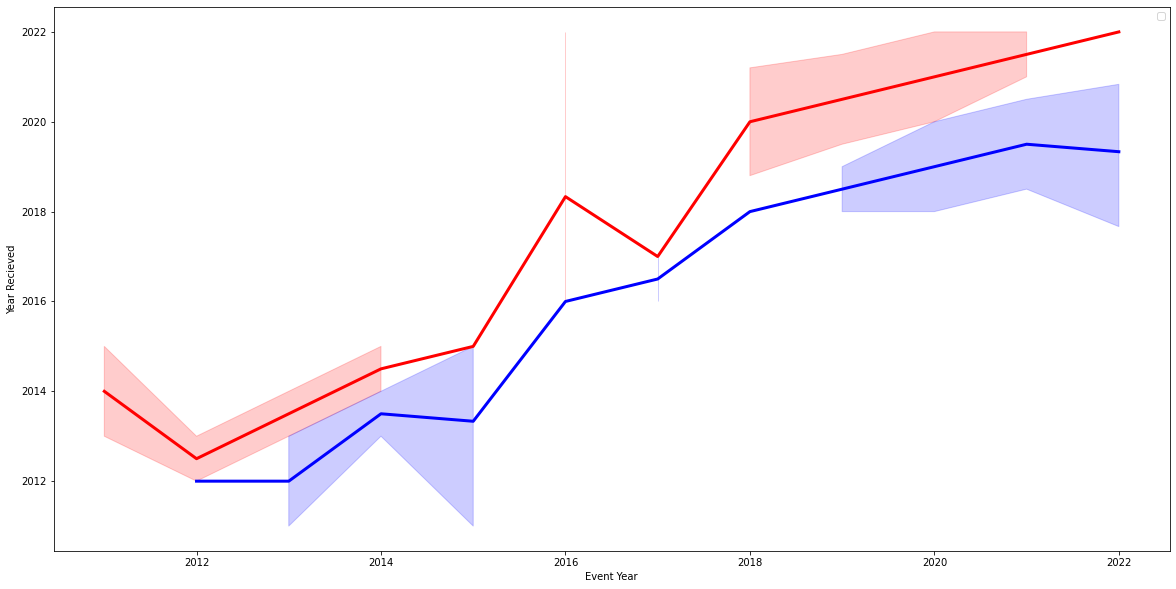

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x = 'Event Year', y = 'Year Recieved', data=new_df_adverse_groupby, color='r', lw=3)
sns.lineplot(x = 'Year Recieved', y = 'Event Year', data=new_df_adverse_groupby, color='b', lw=3)
plt.legend()
plt.show()

The line graph shows the lag between Adverse event registered and Year Recieved in the Adverse Event data

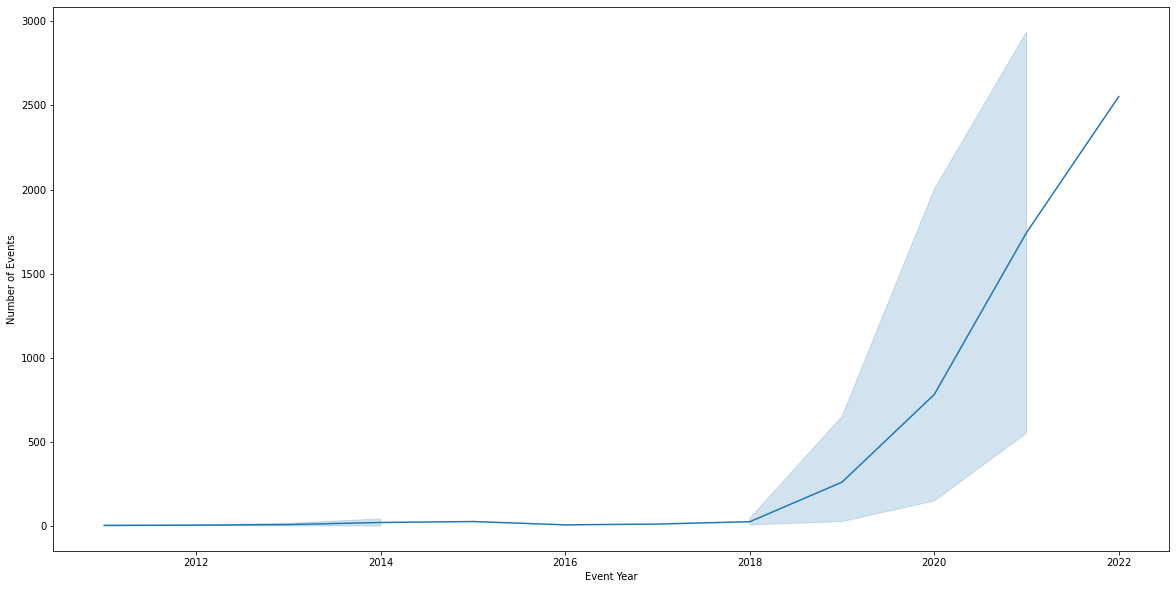

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.lineplot(x='Event Year', y='Number of Events', data=new_df_adverse_groupby)
plt.show()

The Line graph reperesents the relation between Adverse Event Registered Year and Number of Events happen in that year.

In [ ]:
new_df_adverse['Event Month']=new_df_adverse['Event Date'].dt.month.astype(int)
new_df_adverse['Event Day']=new_df_adverse['Event Date'].dt.day.astype(int)

In [ ]:
new_df_adverse_groupby_month =new_df_adverse.groupby(['Event Month']).sum().reset_index()

In [ ]:
new_df_adverse_groupby_month

,Event Month,Number of Events,Event Year,Year Recieved,Event Day
0,1,710,1435132,1435172,10460
1,2,640,1293483,1293513,9069
2,3,660,1333743,1333815,9992
3,4,624,1261009,1261059,9554
4,5,841,1699365,1699500,12431
5,6,557,1125290,1125312,8860
6,7,828,1672804,1672927,13677
7,8,1112,2247321,2247405,22683
8,9,1194,2412797,2412841,15715
9,10,716,1446362,1446662,11559


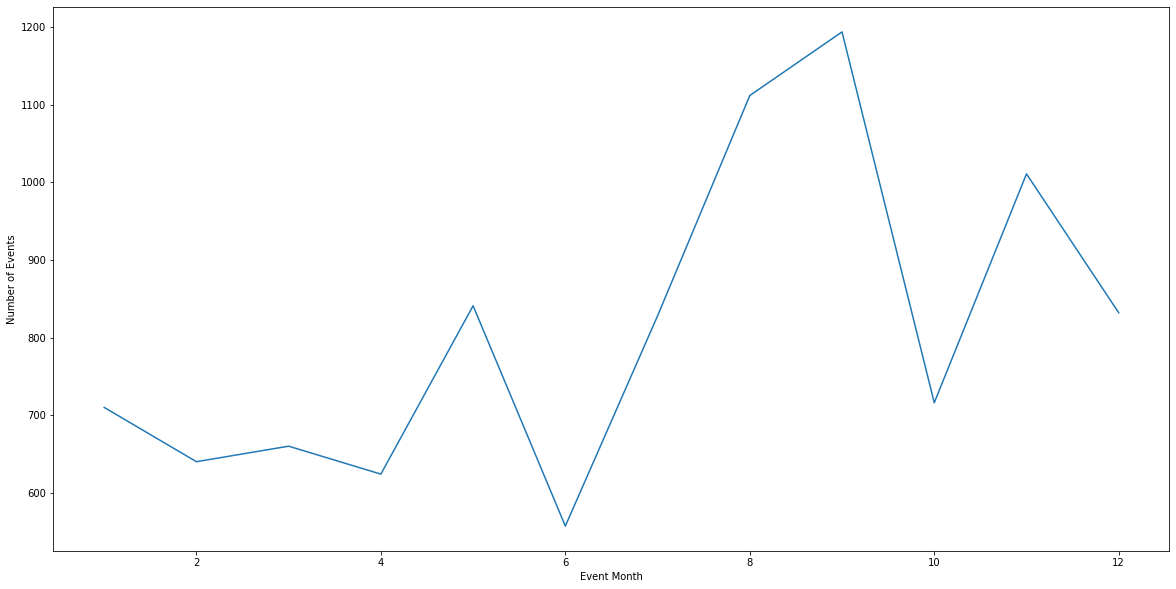

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.lineplot(x='Event Month', y='Number of Events', data=new_df_adverse_groupby_month)
plt.show()

The line graph show on which month there were more events registered 

In [ ]:
new_df_adverse_groupby_day =new_df_adverse.groupby(['Event Day']).sum().reset_index()

In [ ]:
new_df_adverse_groupby_day

,Event Day,Number of Events,Event Year,Year Recieved,Event Month
0,1,683,1380147,1380363,4912
1,2,279,563729,563763,2087
2,3,276,557616,557646,2093
3,4,340,687100,687120,2000
4,5,303,612186,612291,2172
5,6,299,604122,604272,2138
6,7,275,555596,555634,1865
7,8,358,723327,723403,2788
8,9,288,581972,582007,2213
9,10,415,838493,838519,3618


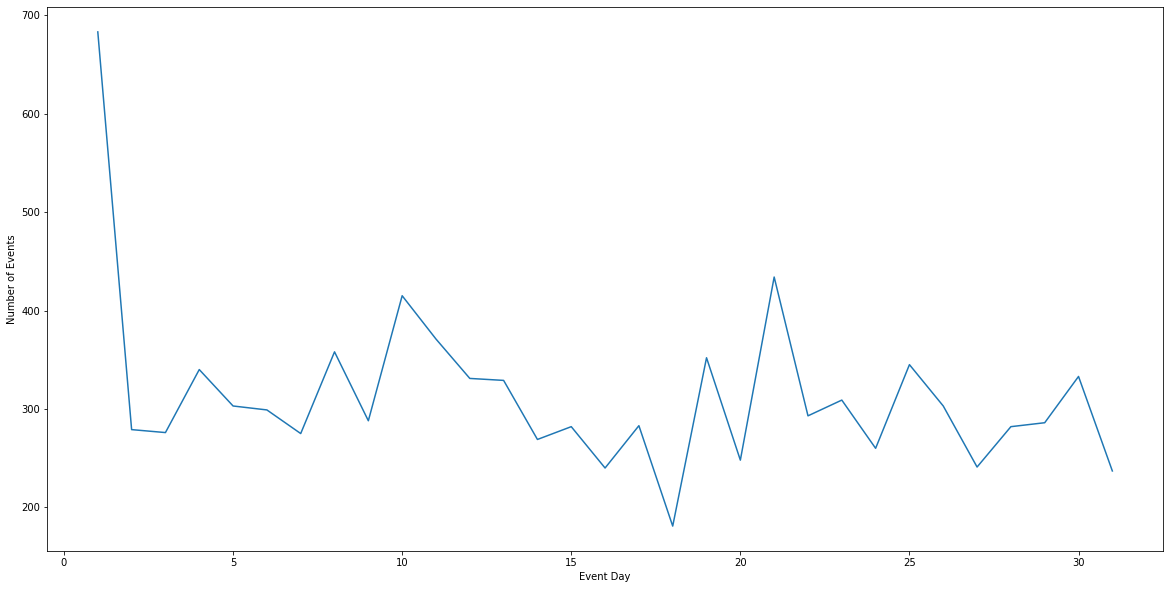

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.lineplot(x='Event Day', y='Number of Events', data=new_df_adverse_groupby_day)
plt.show()

The line graph shows on which day the adverese events are registered more in the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
new_df_adverse.head()

,Report Number,Event Date,Event Type,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Number of Events,Event Text,Event Year,Year Recieved,Event Month,Event Day
12,8030229-2022-02837,2022-04-20 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-05-21 04:00:00,DRT,GZ-130PA,Battery Problem; Protective Measures Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE CUSTOMER REPORTED THAT ...,2022,2022,4,20
13,8030229-2022-02846,2022-04-12 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-05-07 04:00:00,DRT,GZ-130PA,Application Program Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE NURSE REPORTED THAT A P...,2022,2022,4,12
14,8030229-2022-02830,2022-04-04 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-05-05 04:00:00,DRT,GZ-130PA,Communication or Transmission Problem; Patien...,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE CUSTOMER REPORTED THAT ...,2022,2022,4,4
15,8030229-2022-02779,2022-03-30 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-04-29 04:00:00,DRT,GZ-130PA,Battery Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE CUSTOMER REPORTED THAT ...,2022,2022,3,30
16,8030229-2022-02780,2022-03-30 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-04-27 04:00:00,DRT,ZM-521PA,Temperature Problem; Appropriate Term/Code No...,"No Clinical Signs, Symptoms or Conditions",K043517,1,Event Description: THE BIOMEDICAL ENGINEER (BM...,2022,2022,3,30


In [ ]:
new_df_adverse.columns

Index(['Report Number', 'Event Date', 'Event Type', 'Manufacturer',
       'Date Received', 'Product Code', ' Brand Name', ' Device Problem',
       'Patient Problem', 'PMA/PMN Number', 'Number of Events', 'Event Text',
       'Event Year', 'Year Recieved', 'Event Month', 'Event Day'],
      dtype='object')

In [ ]:
eventyr_eventtype= new_df_adverse.groupby(['Event Year','Event Type']).count().reset_index()

In [ ]:
eventyr_eventtype

,Event Year,Event Type,Report Number,Event Date,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Number of Events,Event Text,Year Recieved,Event Month,Event Day
0,2011,Death,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,2011,Malfunction,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2,2012,Death,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,2012,Malfunction,12,12,12,12,12,12,12,12,12,12,12,12,12,12
4,2013,Death,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,2013,Malfunction,16,16,16,16,16,16,16,16,16,16,16,16,16,16
6,2014,Death,6,6,6,6,6,6,6,6,6,6,6,6,6,6
7,2014,Injury,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,2014,Malfunction,38,38,38,38,38,38,38,38,38,38,38,38,38,38
9,2015,Death,2,2,2,2,2,2,2,2,2,2,2,2,2,2


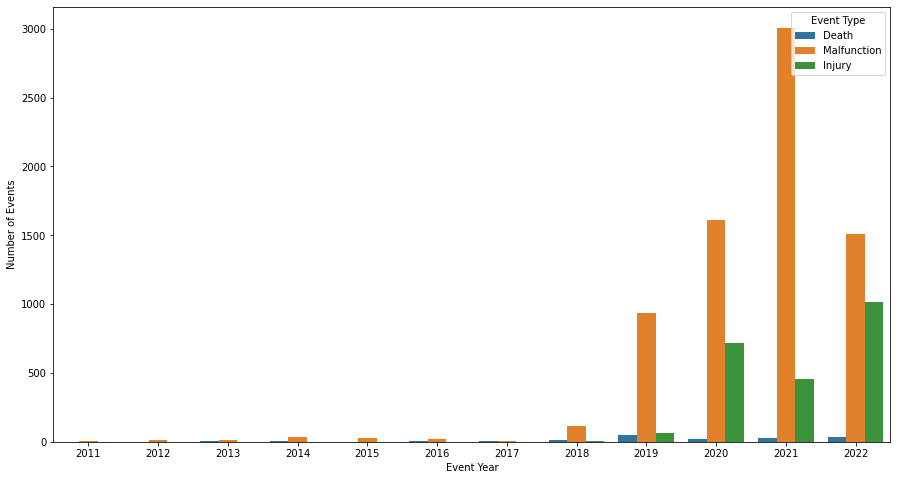

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Event Year',y='Number of Events',hue='Event Type',data=eventyr_eventtype)
plt.show()

The bargraph shows event type registered with event year. 

In [ ]:
new_df_adverse.head()

,Report Number,Event Date,Event Type,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Number of Events,Event Text,Event Year,Year Recieved,Event Month,Event Day
12,8030229-2022-02837,2022-04-20 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-05-21 04:00:00,DRT,GZ-130PA,Battery Problem; Protective Measures Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE CUSTOMER REPORTED THAT ...,2022,2022,4,20
13,8030229-2022-02846,2022-04-12 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-05-07 04:00:00,DRT,GZ-130PA,Application Program Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE NURSE REPORTED THAT A P...,2022,2022,4,12
14,8030229-2022-02830,2022-04-04 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-05-05 04:00:00,DRT,GZ-130PA,Communication or Transmission Problem; Patien...,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE CUSTOMER REPORTED THAT ...,2022,2022,4,4
15,8030229-2022-02779,2022-03-30 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-04-29 04:00:00,DRT,GZ-130PA,Battery Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE CUSTOMER REPORTED THAT ...,2022,2022,3,30
16,8030229-2022-02780,2022-03-30 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-04-27 04:00:00,DRT,ZM-521PA,Temperature Problem; Appropriate Term/Code No...,"No Clinical Signs, Symptoms or Conditions",K043517,1,Event Description: THE BIOMEDICAL ENGINEER (BM...,2022,2022,3,30


In [ ]:
new_df_adv_death=new_df_adverse[(new_df_adverse['Event Type']=='Death')]

In [ ]:
new_df_adv_death

,Report Number,Event Date,Event Type,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Number of Events,Event Text,Event Year,Year Recieved,Event Month,Event Day
178,8030229-2019-00737,2019-11-23,Death,NIHON KOHDEN CORPORATION,2019-12-20,DRT,NI,Adverse Event Without Identified Device or Us...,Death,NI,1,Event Description: THE DIRECTOR OF IS AND CLIN...,2019,2019,11,23
195,1220908-2019-03795,2019-11-19,Death,ZOLL MEDICAL CORPORATION,2019-12-10,DRT,X SERIES,Unable to Obtain Readings,Death,K112432/P160,1,Event Description: COMPLAINANT ALLEGED THAT WH...,2019,2019,11,19
210,1220908-2019-03653,2019-10-01,Death,ZOLL MEDICAL CORPORATION,2019-11-26,DRT,R SERIES DEFIBRILLATOR,Unable to Obtain Readings,Death,K060559/P160,1,Event Description: COMPLAINANT ALLEGED THAT WH...,2019,2019,10,1
228,1220908-2019-03659,2019-11-01,Death,ZOLL MEDICAL CORPORATION,2019-11-14,DRT,X SERIES,Unable to Obtain Readings,Death,K112432/P160,1,Event Description: COMPLAINANT ALLEGED THAT WH...,2019,2019,11,1
255,1220908-2019-03192,2019-10-01,Death,ZOLL MEDICAL CORPORATION,2019-10-22,DRT,R SERIES DEFIBRILLATOR,Unable to Obtain Readings,Death; No Consequences Or Impact To Patient,K060559/P160,1,Event Description: COMPLAINANT ALLEGED THAT WH...,2019,2019,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12923,2031172-2014-00235,2014-09-03,Death,MASIMO CORPORATION,2014-10-03,MSX,MASIMO PT,Adverse Event Without Identified Device or Us...,Death; Embolism,K071047,1,Event Description: IT WAS REPORTED BY THE CUST...,2014,2014,9,3
12933,2031172-2014-00114,2014-04-29,Death,MASIMO CORPORATION,2014-07-11,MSX,MASIMO PT SAFETY NET,Defective Alarm; Device Displays Incorrect Me...,Distress,K071047,1,Event Description: IT WAS REPORTED BY THE CUST...,2014,2014,4,29
12945,2031172-2014-00014,2014-01-09,Death,MASIMO CORPORATION,2014-02-26,MSX,MASIMO PATIENT SAFETY NET,No Audible Alarm,Death,K071047,1,Event Description: IT WAS REPORTED THAT A PATI...,2014,2014,1,9
12947,2031172-2014-00002,2013-12-08,Death,MASIMO CORPORATION,2014-01-07,MSX,MASIMO PATIENT SAFETY NET,No Audible Alarm,Death,K071047,1,Event Description: IT WAS REPORTED THAT A PT P...,2013,2014,12,8


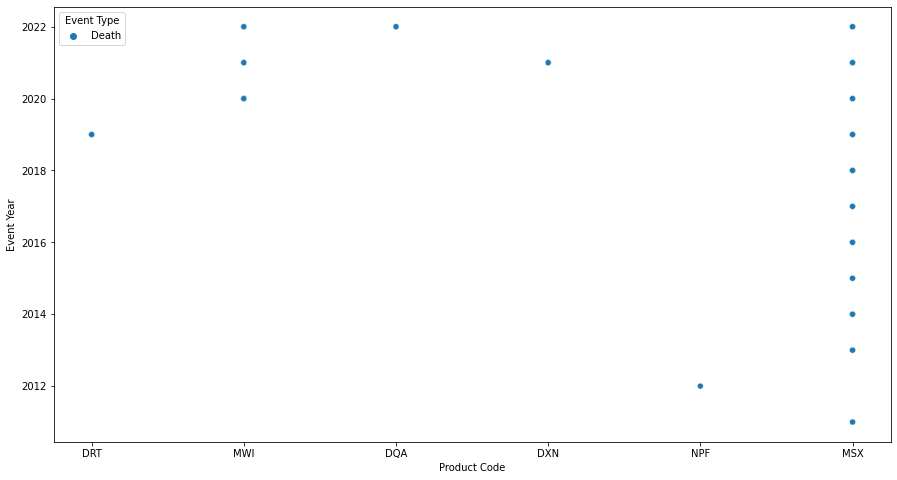

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Product Code',y='Event Year',hue='Event Type',data=new_df_adv_death)
plt.show()

The scatterplot shows which product has more death event type.

In [ ]:
new_df_adverse.head()

,Report Number,Event Date,Event Type,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Number of Events,Event Text,Event Year,Year Recieved,Event Month,Event Day
12,8030229-2022-02837,2022-04-20 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-05-21 04:00:00,DRT,GZ-130PA,Battery Problem; Protective Measures Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE CUSTOMER REPORTED THAT ...,2022,2022,4,20
13,8030229-2022-02846,2022-04-12 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-05-07 04:00:00,DRT,GZ-130PA,Application Program Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE NURSE REPORTED THAT A P...,2022,2022,4,12
14,8030229-2022-02830,2022-04-04 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-05-05 04:00:00,DRT,GZ-130PA,Communication or Transmission Problem; Patien...,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE CUSTOMER REPORTED THAT ...,2022,2022,4,4
15,8030229-2022-02779,2022-03-30 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-04-29 04:00:00,DRT,GZ-130PA,Battery Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,Event Description: THE CUSTOMER REPORTED THAT ...,2022,2022,3,30
16,8030229-2022-02780,2022-03-30 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-04-27 04:00:00,DRT,ZM-521PA,Temperature Problem; Appropriate Term/Code No...,"No Clinical Signs, Symptoms or Conditions",K043517,1,Event Description: THE BIOMEDICAL ENGINEER (BM...,2022,2022,3,30


In [ ]:
new_df_adverse.columns

Index(['Report Number', 'Event Date', 'Event Type', 'Manufacturer',
       'Date Received', 'Product Code', ' Brand Name', ' Device Problem',
       'Patient Problem', 'PMA/PMN Number', 'Number of Events', 'Event Text',
       'Event Year', 'Year Recieved', 'Event Month', 'Event Day'],
      dtype='object')

In [ ]:
new_df_adverse[' Device Problem'].unique()

array([' Battery Problem; Protective Measures Problem',
       ' Application Program Problem',
       ' Communication or Transmission Problem; Patient Data Problem',
       ' Battery Problem',
       ' Temperature Problem; Appropriate Term/Code Not Available',
       ' Output Problem', ' Temperature Problem',
       ' Overheating of Device; Temperature Problem',
       ' Communication or Transmission Problem', ' Pacing Problem',
       ' Incorrect, Inadequate or Imprecise Resultor Readings; Output Problem',
       ' Incorrect, Inadequate or Imprecise Resultor Readings; Data Problem',
       ' Appropriate Term/Code Not Available',
       ' Communication or Transmission Problem; Output Problem',
       ' Loss of Data', ' Protective Measures Problem',
       ' No Audible Prompt/Feedback',
       ' Electrical /Electronic Property Problem; Unintended Electrical Shock',
       ' Power Problem; Intermittent Loss of Power',
       ' Failure to Select Signal; Device Sensing Problem',
       ' B

In [ ]:
new_df_adverse_1=new_df_adverse.groupby([' Device Problem','Event Type','Event Year','Product Code']).count().reset_index()

In [ ]:
new_df_adverse_1_death=new_df_adverse_1[(new_df_adverse_1['Event Type']=='Death')]

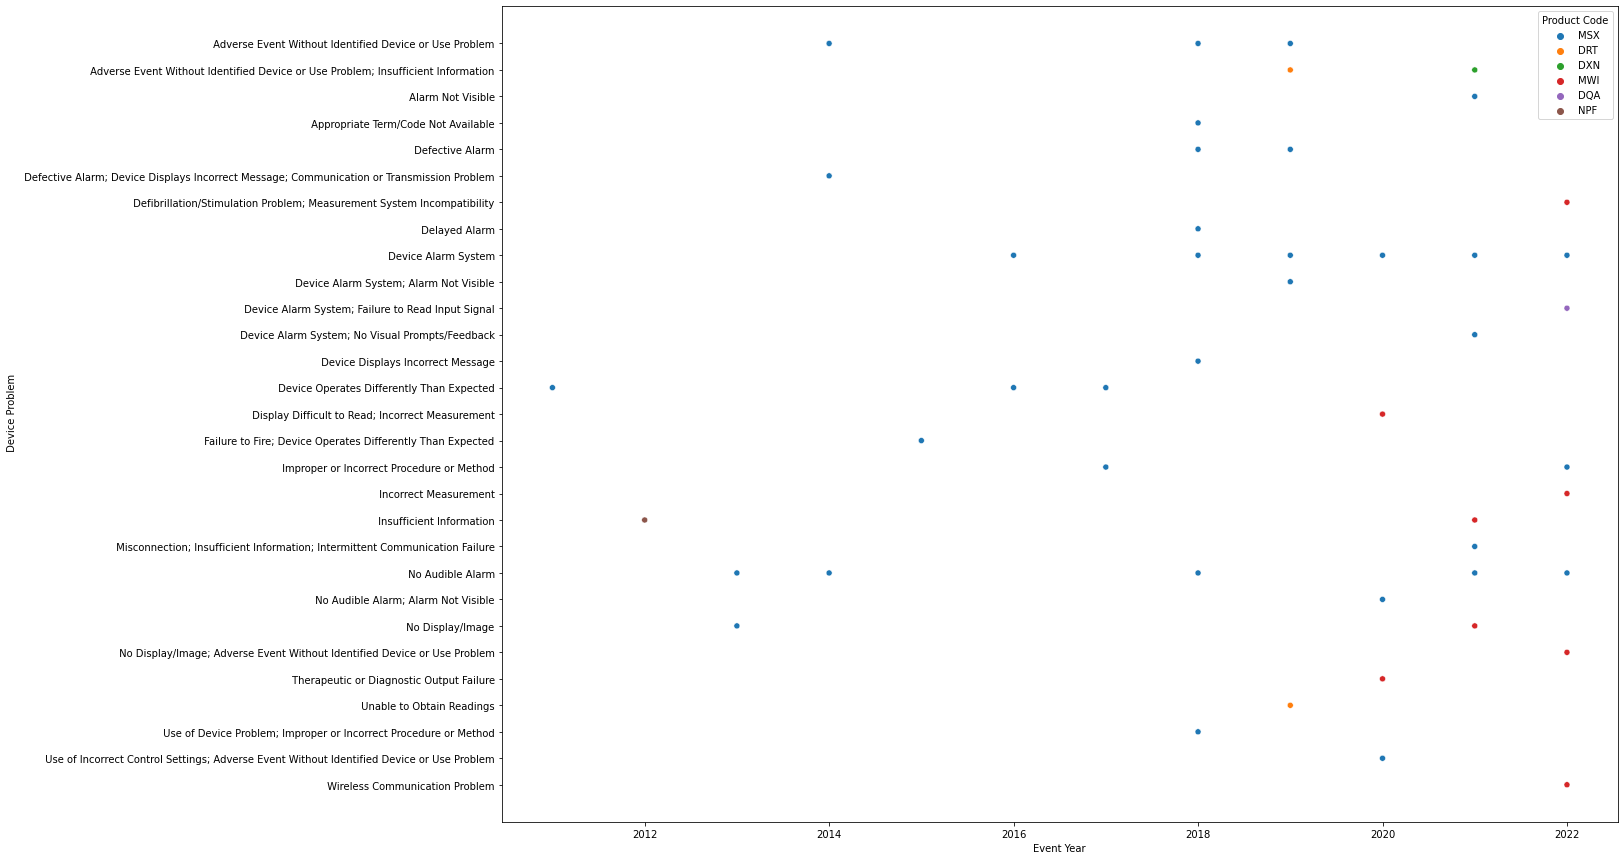

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='Event Year',y=' Device Problem',hue='Product Code',data=new_df_adverse_1_death)
plt.show()

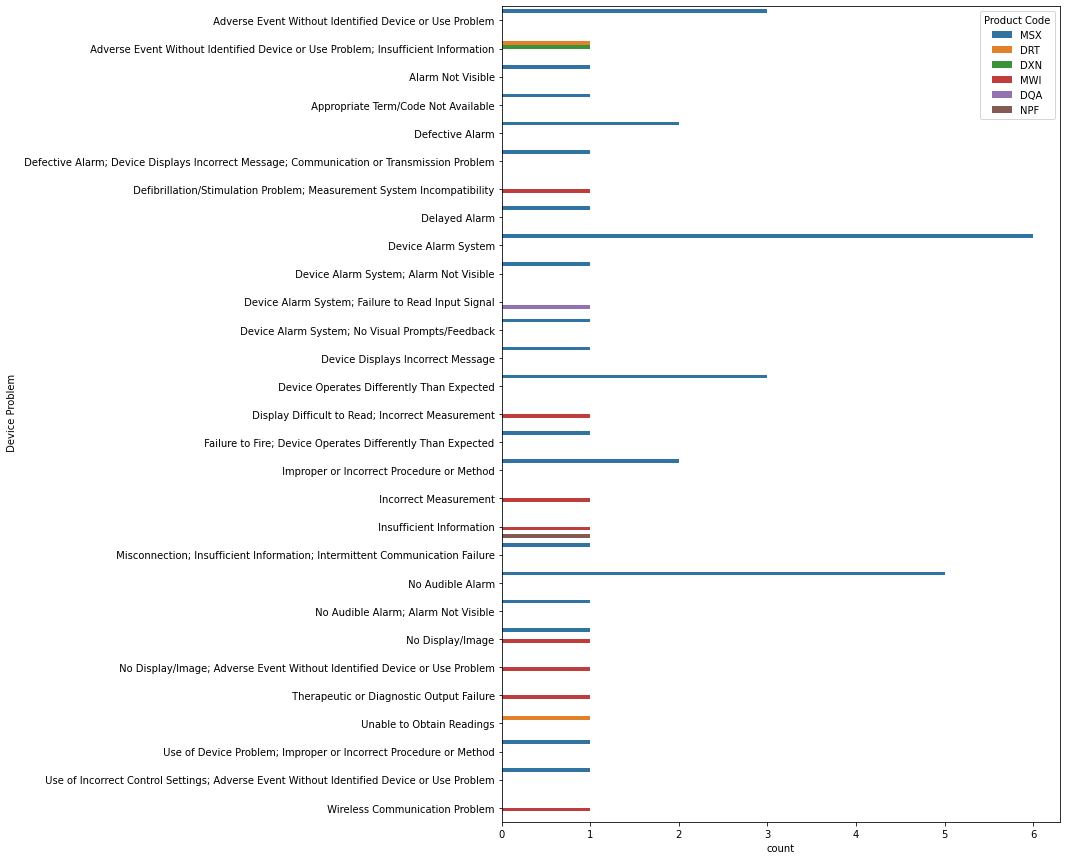

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(y=' Device Problem',hue='Product Code',data=new_df_adverse_1_death)
#plt.xticks(rotation=90)
plt.show()

The horizontal bar graph shows which device problem with respect to device.

In [ ]:
new_df_adverse_2=new_df_adverse.groupby([' Device Problem','Patient Problem','Event Type','Event Year','Product Code']).count().reset_index()

In [ ]:
new_df_adverse_2=new_df_adverse_2[(new_df_adverse_2['Event Type']=='Death')]

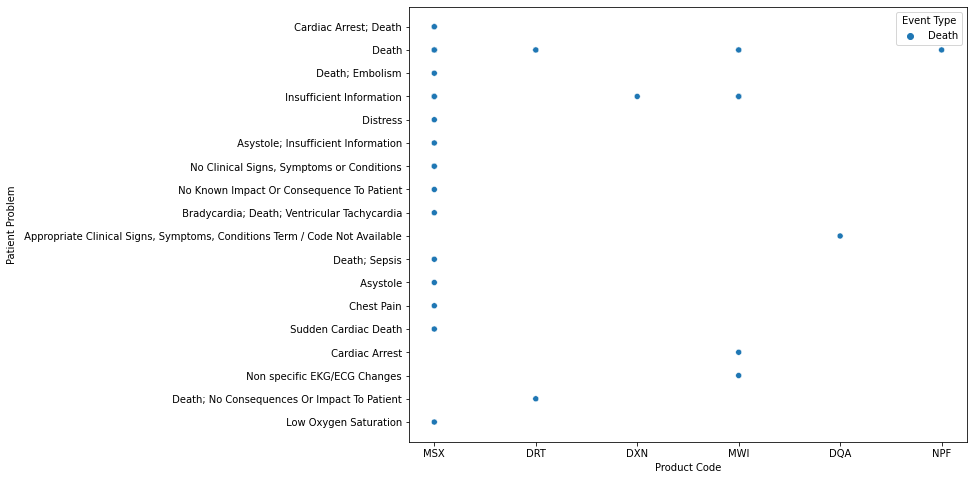

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Product Code',y='Patient Problem',hue='Event Type',data=new_df_adverse_2)
#plt.xticks(rotation=90)
plt.show()

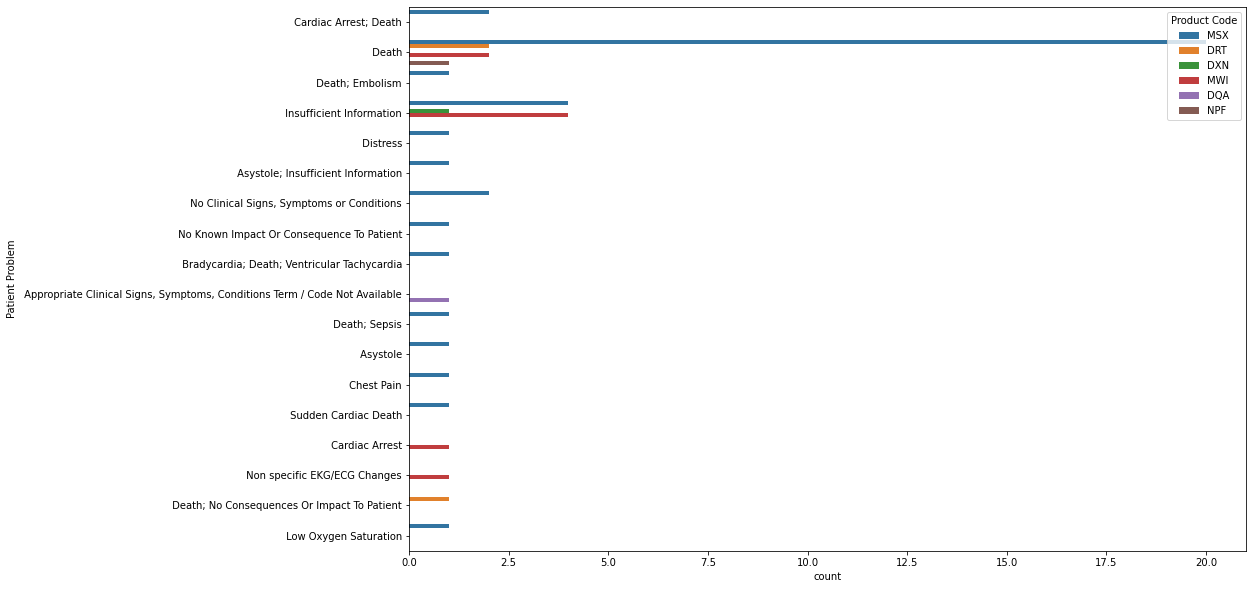

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='Patient Problem',hue='Product Code',data=new_df_adverse_2)
#plt.xticks(rotation=90)
plt.show()

The horizontal bar graph shows which patient problem with respect to device.

In [ ]:
new_df_adverse['Event Year - Recieved Year']= new_df_adverse['Year Recieved']-new_df_adverse['Event Year']

In [ ]:
new_df_adverse['Event Year - Recieved Year'].unique()

array([0, 1, 4, 2, 3, 6])

In [ ]:
new_df_adverse.columns

Index(['Report Number', 'Event Date', 'Event Type', 'Manufacturer',
       'Date Received', 'Product Code', ' Brand Name', ' Device Problem',
       'Patient Problem', 'PMA/PMN Number', 'Number of Events', 'Event Text',
       'Event Year', 'Year Recieved', 'Event Month', 'Event Day',
       'Event Year - Recieved Year'],
      dtype='object')

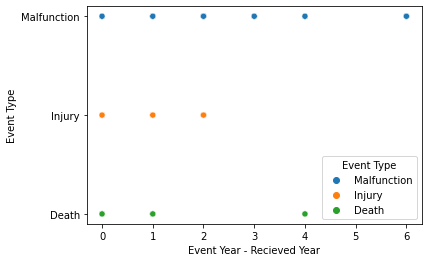

In [ ]:
sns.scatterplot(x='Event Year - Recieved Year',y='Event Type',hue='Event Type',data=new_df_adverse)
plt.show()

The scatter graph shows which event type has more lag  in event happened year and recieved year.

In [ ]:
event_text_nan_df=df_adverse[df_adverse['Event Text'].isna()]

In [ ]:
event_text_nan_df

,Report Number,Event Date,Event Type,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Number of Events,Event Text,Event Year
0,8030229-2022-03110,2022-09-06 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-28 04:00:00,DRT,ZM-531PA,Communication or Transmission Problem,"No Clinical Signs, Symptoms or Conditions",K043517,1,NaN,2022.0
1,8030229-2022-03068,2022-08-10 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-09 04:00:00,DRT,ZM-531PA,Output Problem,"No Clinical Signs, Symptoms or Conditions",K043517,1,NaN,2022.0
2,8030229-2022-03055,2022-08-10 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-08 04:00:00,DRT,GZ-130PA,Communication or Transmission Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,NaN,2022.0
3,8030229-2022-03054,2022-08-09 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-07 04:00:00,DRT,GZ-130PA,Communication or Transmission Problem; Interm...,"No Clinical Signs, Symptoms or Conditions",K153707,1,NaN,2022.0
4,8030229-2022-03089,2022-08-08 04:00:00,Malfunction,NIHON KOHDEN CORPORATION,2022-09-07 04:00:00,DRT,GZ-130PA,Output Problem,"No Clinical Signs, Symptoms or Conditions",K153707,1,NaN,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23605,2032227-2022-335460,2022-09-06 04:00:00,Malfunction,MEDTRONIC MINIMED,2022-09-14 04:00:00,MDS,TRANSMITTER MMT-7841QZW GST5G OUS LCKOUT,Battery Problem,"No Clinical Signs, Symptoms or Conditions",NaN,1,NaN,2022.0
23606,2032227-2022-335462,2022-09-06 04:00:00,Malfunction,MEDTRONIC MINIMED,2022-09-14 04:00:00,MDS,"GST4C, OUS",Battery Problem,"No Clinical Signs, Symptoms or Conditions",NaN,1,NaN,2022.0
23607,2032227-2022-335470,2022-09-04 04:00:00,Malfunction,MEDTRONIC MINIMED,2022-09-14 04:00:00,MDS,RPL MMT-7811W1 XMTR GST3C LOCKOUT 2.2A,Battery Problem,"No Clinical Signs, Symptoms or Conditions",NaN,1,NaN,2022.0
23608,2032227-2022-335473,2022-09-05 04:00:00,Malfunction,MEDTRONIC MINIMED,2022-09-14 04:00:00,MDS,STARTER KIT MMT-7821WW GST4C OUS,Battery Problem,"No Clinical Signs, Symptoms or Conditions",NaN,1,NaN,2022.0


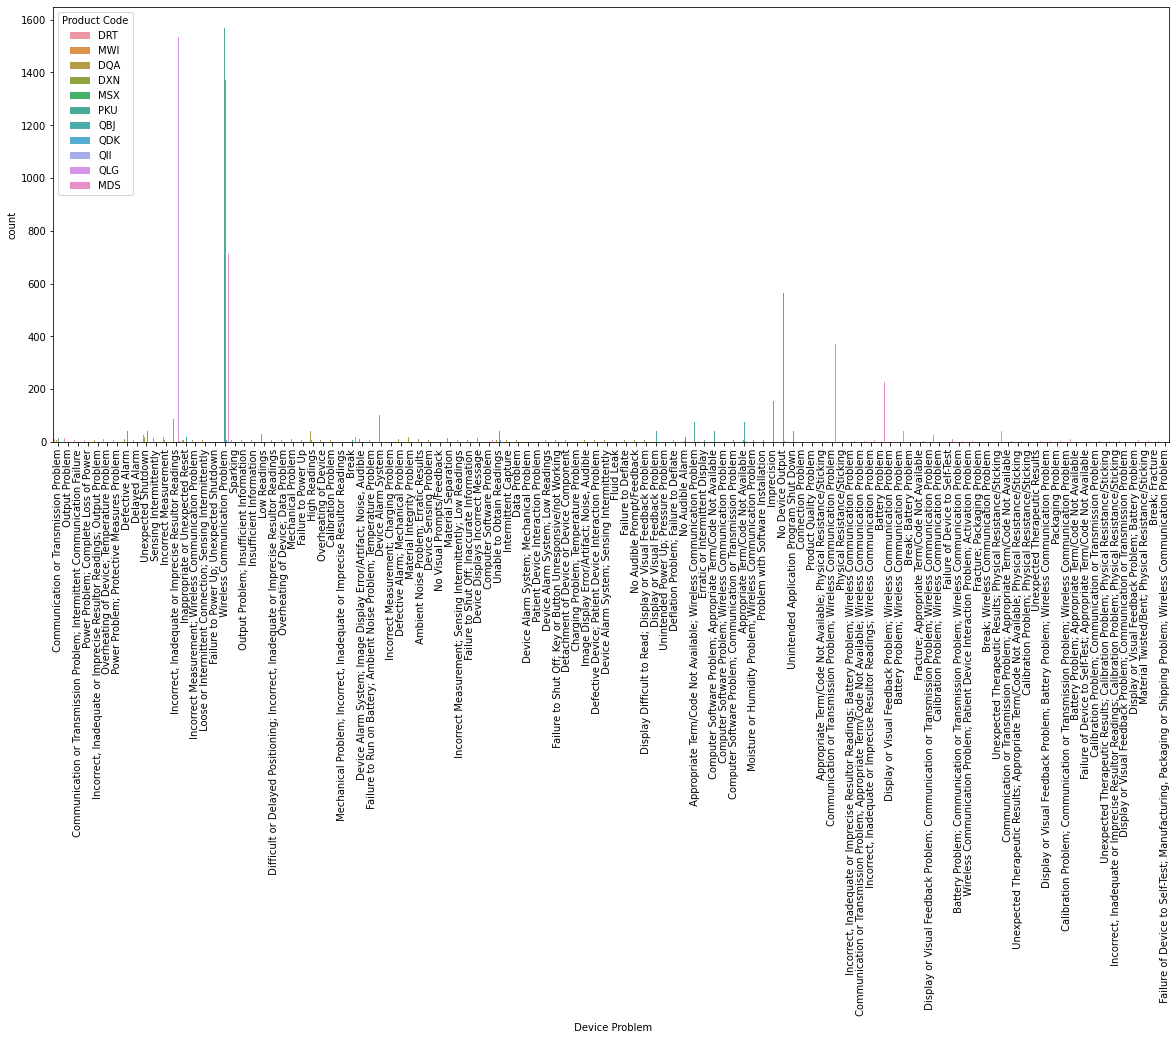

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=' Device Problem',hue='Product Code',data=event_text_nan_df,linewidth=5)
plt.xticks(rotation=90)
plt.show()

The graph shows product code with count of device problem for the respective product code.

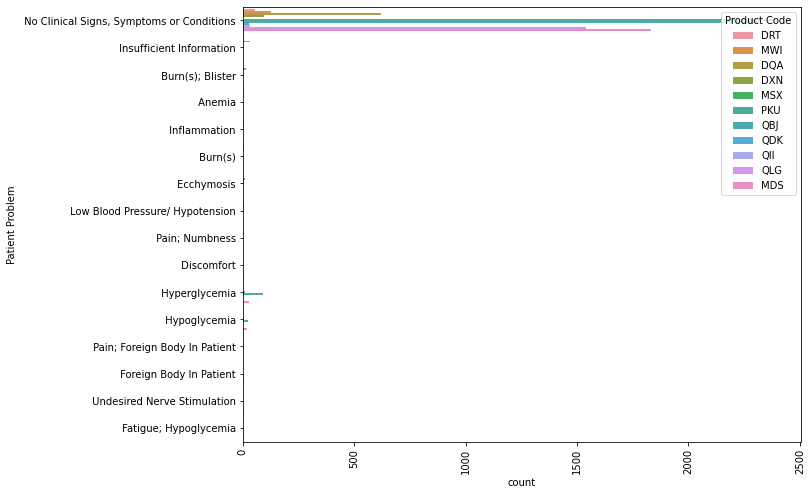

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='Patient Problem',hue='Product Code',data=event_text_nan_df)
plt.xticks(rotation=90)
plt.show()

The graph shows product code with count of patient problem for the respective product code.

In [ ]:
new_df_adverse_death=new_df_adverse[(new_df_adverse['Event Type']=='Death')]  #taking only event type death

In [ ]:
new_df_adverse_death

,Report Number,Event Date,Event Type,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Number of Events,Event Text,Event Year,Year Recieved,Event Month,Event Day,Event Year - Recieved Year
178,8030229-2019-00737,2019-11-23,Death,NIHON KOHDEN CORPORATION,2019-12-20,DRT,NI,Adverse Event Without Identified Device or Us...,Death,NI,1,Event Description: THE DIRECTOR OF IS AND CLIN...,2019,2019,11,23,0
195,1220908-2019-03795,2019-11-19,Death,ZOLL MEDICAL CORPORATION,2019-12-10,DRT,X SERIES,Unable to Obtain Readings,Death,K112432/P160,1,Event Description: COMPLAINANT ALLEGED THAT WH...,2019,2019,11,19,0
210,1220908-2019-03653,2019-10-01,Death,ZOLL MEDICAL CORPORATION,2019-11-26,DRT,R SERIES DEFIBRILLATOR,Unable to Obtain Readings,Death,K060559/P160,1,Event Description: COMPLAINANT ALLEGED THAT WH...,2019,2019,10,1,0
228,1220908-2019-03659,2019-11-01,Death,ZOLL MEDICAL CORPORATION,2019-11-14,DRT,X SERIES,Unable to Obtain Readings,Death,K112432/P160,1,Event Description: COMPLAINANT ALLEGED THAT WH...,2019,2019,11,1,0
255,1220908-2019-03192,2019-10-01,Death,ZOLL MEDICAL CORPORATION,2019-10-22,DRT,R SERIES DEFIBRILLATOR,Unable to Obtain Readings,Death; No Consequences Or Impact To Patient,K060559/P160,1,Event Description: COMPLAINANT ALLEGED THAT WH...,2019,2019,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12923,2031172-2014-00235,2014-09-03,Death,MASIMO CORPORATION,2014-10-03,MSX,MASIMO PT,Adverse Event Without Identified Device or Us...,Death; Embolism,K071047,1,Event Description: IT WAS REPORTED BY THE CUST...,2014,2014,9,3,0
12933,2031172-2014-00114,2014-04-29,Death,MASIMO CORPORATION,2014-07-11,MSX,MASIMO PT SAFETY NET,Defective Alarm; Device Displays Incorrect Me...,Distress,K071047,1,Event Description: IT WAS REPORTED BY THE CUST...,2014,2014,4,29,0
12945,2031172-2014-00014,2014-01-09,Death,MASIMO CORPORATION,2014-02-26,MSX,MASIMO PATIENT SAFETY NET,No Audible Alarm,Death,K071047,1,Event Description: IT WAS REPORTED THAT A PATI...,2014,2014,1,9,0
12947,2031172-2014-00002,2013-12-08,Death,MASIMO CORPORATION,2014-01-07,MSX,MASIMO PATIENT SAFETY NET,No Audible Alarm,Death,K071047,1,Event Description: IT WAS REPORTED THAT A PT P...,2013,2014,12,8,1


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [ ]:
new_df_adverse_death['Event Text'].isnull().sum()

0

In [ ]:
new_df_adverse_death['Event Text']= new_df_adverse_death['Event Text'].str.lower()
new_df_adverse_death['Event Text'].head()

178    event description: the director of is and clin...
195    event description: complainant alleged that wh...
210    event description: complainant alleged that wh...
228    event description: complainant alleged that wh...
255    event description: complainant alleged that wh...
Name: Event Text, dtype: object

In [ ]:
new_df_adverse_death = new_df_adverse_death['Event Text'].str.split(' ')
new_df_adverse_death.head()

178    [event, description:, the, director, of, is, a...
195    [event, description:, complainant, alleged, th...
210    [event, description:, complainant, alleged, th...
228    [event, description:, complainant, alleged, th...
255    [event, description:, complainant, alleged, th...
Name: Event Text, dtype: object

In [ ]:
all_eventtext_cleaned = []

for text in new_df_adverse_death:
    text = [x.strip(string.punctuation) for x in text]
    all_eventtext_cleaned.append(text)

all_eventtext_cleaned[0]

text_event_death = [" ".join(text) for text in all_eventtext_cleaned]
final_text_event_death = " ".join(text_event_death)
final_text_event_death[:500]

'event description the director of is and clinical engineering reported that a patient expired while being monitored on an nk telemetry transmitter that is all the information that was received from them as they are still investigating this issue internally attempts have been made to get additional description of event and patient details with no response as of yet it is unclear if the device malfunctioned and no device model or serial number information was provided however as there has been a p'

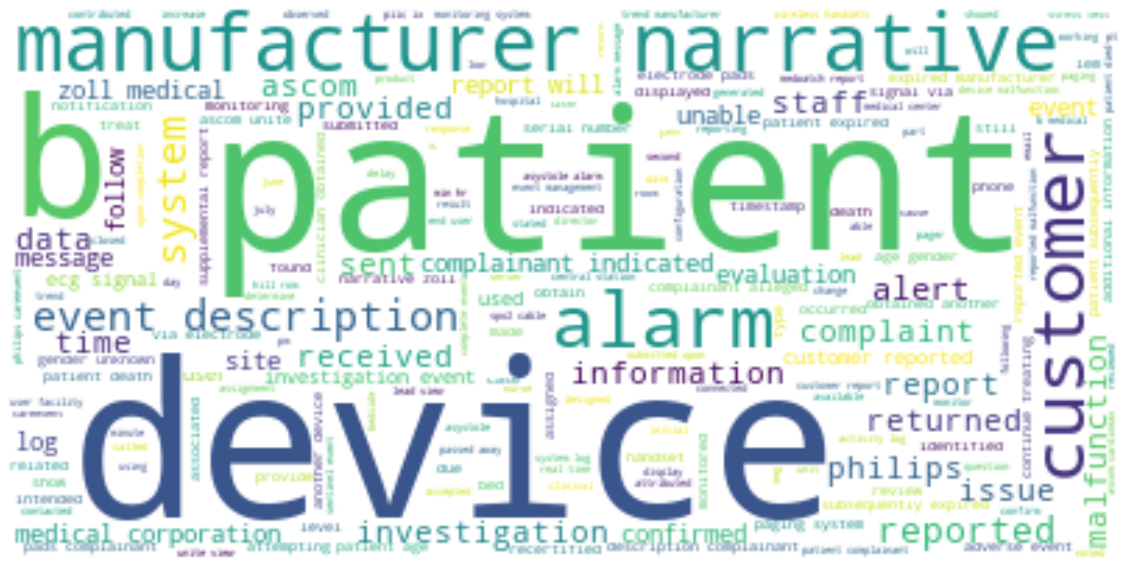

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['the','is','was','that','of','on','a','and','in','this','at','no','as','with','it'])
wordcloud_spam = WordCloud(stopwords=stopwords,background_color="white").generate(final_text_event_death)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

filtered_words = [word for word in final_text_event_death.split()if word not in stopwords]
counted_words_ = collections.Counter(filtered_words)

word_count = {}

for letter, count in counted_words_.most_common(30):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: patient, count: 607
Word: device, count: 524
Word: event, count: 444
Word: customer, count: 322
Word: system, count: 311
Word: reported, count: 282
Word: manufacturer, count: 276
Word: narrative, count: 251
Word: b)(6, count: 237
Word: report, count: 217
Word: description, count: 206
Word: investigation, count: 186
Word: information, count: 183
Word: alarms, count: 164
Word: philips, count: 161
Word: alarm, count: 156
Word: ascom, count: 146
Word: indicated, count: 138
Word: medical, count: 135
Word: complainant, count: 125
Word: staff, count: 125
Word: user, count: 123
Word: logs, count: 115
Word: time, count: 114
Word: data, count: 111
Word: malfunction, count: 109
Word: expired, count: 105
Word: number, count: 104
Word: ecg, count: 103
Word: received, count: 98


In [ ]:
new_df_adverse['Event Type'].value_counts()

Malfunction    7297
Injury         2254
Death           174
Name: Event Type, dtype: int64

In [ ]:
new_df_adverse_malfunction=new_df_adverse[(new_df_adverse['Event Type']=='Malfunction')]
new_df_adverse_malfunction['Event Text']= new_df_adverse_malfunction['Event Text'].str.lower()
new_df_adverse_malfunction = new_df_adverse_malfunction['Event Text'].str.split(' ')


In [ ]:
all_eventtext_cleaned = []

for text in new_df_adverse_malfunction:
    text = [x.strip(string.punctuation) for x in text]
    all_eventtext_cleaned.append(text)

all_eventtext_cleaned[0]

text_event_malfunction = [" ".join(text) for text in all_eventtext_cleaned]
final_text_event_malfunction = " ".join(text_event_malfunction)
final_text_event_malfunction[:500]



'event description the customer reported that their gz battery warning did not appear or alarm to notify the staff of a dying battery because the device did not alarm the patient was not being monitored for quite some time until someone from their staffed noticed it no known harm or injury occurred manufacturer narrative the customer reported that their gz battery warning did not appear or alarm to notify the staff of a dying battery because the device did not alarm the patient was not being moni'

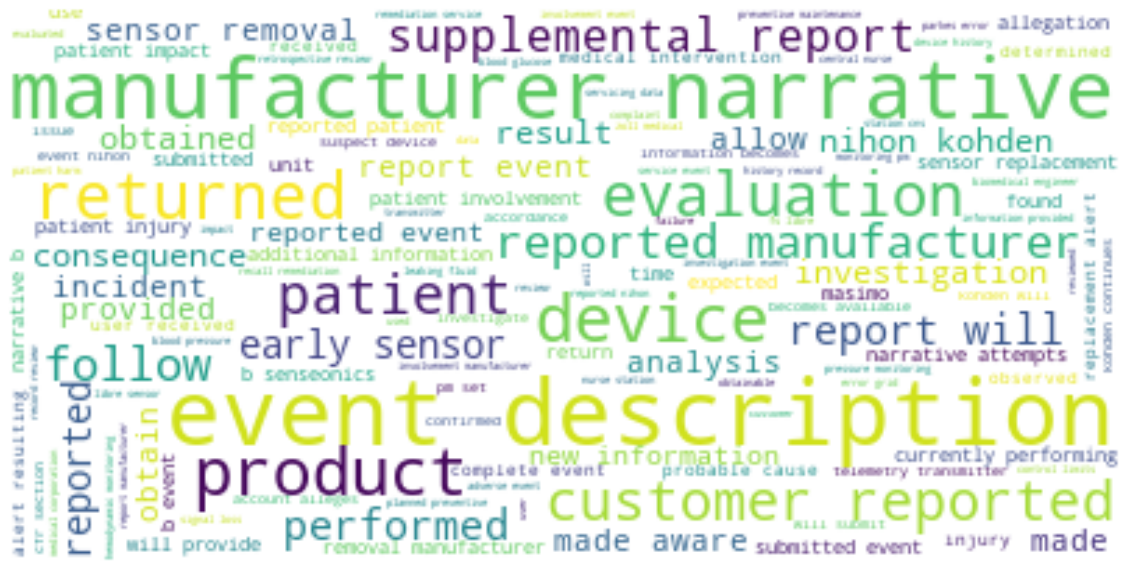

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['the','is','was','that','of','on','a','and','in','this','at','no','as','with','it'])
wordcloud_spam = WordCloud(stopwords=stopwords,background_color="white").generate(final_text_event_malfunction)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

filtered_words = [word for word in final_text_event_malfunction.split()if word not in stopwords]
counted_words_ = collections.Counter(filtered_words)

word_count = {}

for letter, count in counted_words_.most_common(30):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: reported, count: 12735
Word: event, count: 9957
Word: patient, count: 9267
Word: manufacturer, count: 8898
Word: device, count: 8056
Word: narrative, count: 7639
Word: description, count: 7414
Word: report, count: 6192
Word: will, count: 5715
Word: customer, count: 4924
Word: information, count: 4891
Word: product, count: 4575
Word: sensor, count: 4375
Word: returned, count: 3916
Word: evaluation, count: 3818
Word: investigation, count: 3453
Word: submitted, count: 2705
Word: made, count: 2527
Word: supplemental, count: 2431
Word: injury, count: 2348
Word: transmitter, count: 2344
Word: performed, count: 2205
Word: user, count: 2095
Word: follow, count: 2056
Word: early, count: 1904
Word: obtained, count: 1877
Word: received, count: 1860
Word: data, count: 1833
Word: provided, count: 1831
Word: b)(6, count: 1822


In [ ]:
new_df_adverse_injury=new_df_adverse[(new_df_adverse['Event Type']=='Injury')]
new_df_adverse_injury['Event Text']= new_df_adverse_injury['Event Text'].str.lower()
new_df_adverse_injury = new_df_adverse_injury['Event Text'].str.split(' ')

In [ ]:
all_eventtext_cleaned = []

for text in new_df_adverse_injury:
    text = [x.strip(string.punctuation) for x in text]
    all_eventtext_cleaned.append(text)

all_eventtext_cleaned[0]

text_event_injury = [" ".join(text) for text in all_eventtext_cleaned]
final_text_event_injury = " ".join(text_event_injury)
final_text_event_injury[:500]

'event description the customer reported that their transmitter is no longer transmitting wirelessly the customer also reported that the unit battery overheated they confirmed that the battery in question did cause some discomfort to the nurse but not to the patient manufacturer narrative the customer reported that their transmitter is no longer transmitting wirelessly the customer also reported that the unit battery overheated they confirmed that the battery in question did cause some discomfort'

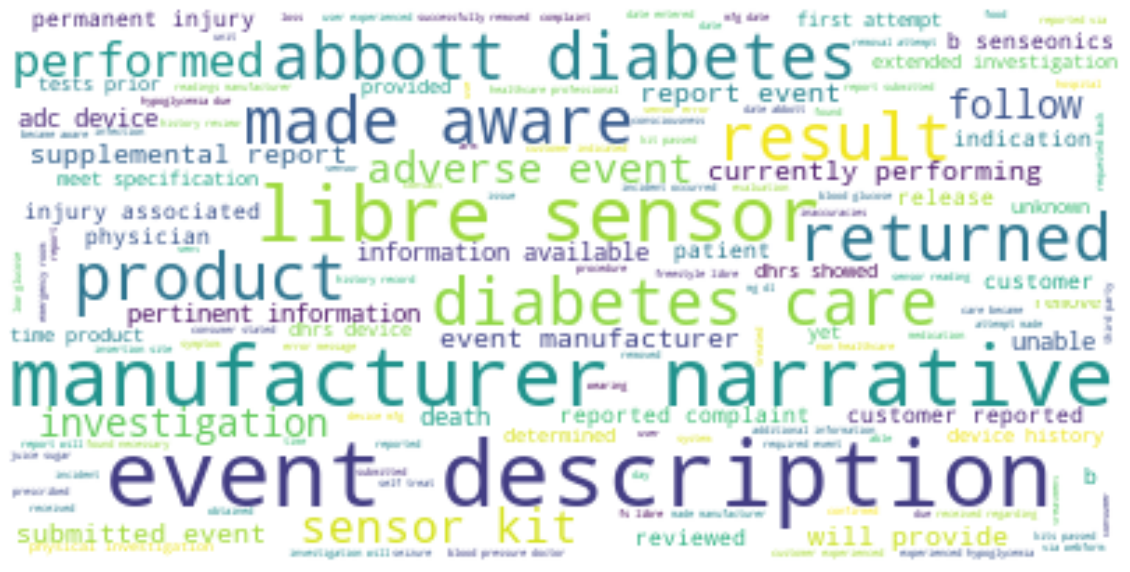

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['the','is','was','that','of','on','a','and','in','this','at','no','as','with','it'])
wordcloud_spam = WordCloud(stopwords=stopwords,background_color="white").generate(final_text_event_injury)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
filtered_words = [word for word in final_text_event_injury.split()if word not in stopwords]
counted_words_ = collections.Counter(filtered_words)

word_count = {}

for letter, count in counted_words_.most_common(30):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: event, count: 4975
Word: sensor, count: 4706
Word: manufacturer, count: 3112
Word: investigation, count: 2581
Word: report, count: 2526
Word: description, count: 2279
Word: narrative, count: 2274
Word: customer, count: 2246
Word: reported, count: 2220
Word: libre, count: 2150
Word: product, count: 2011
Word: device, count: 1995
Word: made, count: 1846
Word: will, count: 1750
Word: aware, count: 1710
Word: information, count: 1689
Word: submitted, count: 1512
Word: date, count: 1475
Word: care, count: 1365
Word: diabetes, count: 1295
Word: abbott, count: 1255
Word: b)(6, count: 1200
Word: returned, count: 1195
Word: performed, count: 1180
Word: dhrs, count: 1140
Word: user, count: 1105
Word: adverse, count: 1076
Word: complaint, count: 997
Word: results, count: 955
Word: patient, count: 954


**Apply BERTopic**

In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.8 MB/s 
     |████████████████████████████████| 5.2 MB 11.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 4.6 MB/s 
     |████████████████████████████████| 636 kB 53.2 MB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 5.5 MB 34.3 MB/s 
     |████████████████████████████████| 1.3 MB 61.0 MB/s 
     |████████████████████████████████| 182 kB 48.3 MB/s 
     |████████████████████████████████| 7.6 MB 34.0 MB/s 
     |████████████████████████████████| 1.1 MB 53.5 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340724 sha256=1237fe88949d1d38c1b5a7e162c01084975fed3a34603bf0c63963e91c03b7e1
  Stored in directory: /root/.cache

In [ ]:
from bertopic import BERTopic

In [ ]:
death_event_text = new_df_adv_death['Event Text']

In [ ]:
remove_=[]
remove_special=[]
remove_num=[]
from tqdm import tqdm
import re
for i in tqdm(death_event_text):
  remove_.append(re.sub('Event Description:' ,'', str(i)))
for lines in tqdm(remove_):
  remove_special.append(re.sub('[^A-Za-z0-9]+(\s)\d+(\s)',' ', lines))
for text in tqdm(remove_special):
  remove_num.append(re.sub(r'[~^0-9]','',text))
stopwords = set(STOPWORDS)
stopwords.update(['the','is','was','that','of','on','a','and','in','this','at','no','as','with','it'])
tokens_without_sw=[]
for i in remove_num:
   for word in remove_num:
      if not word in stopwords:
        tokens_without_sw.append(word)


100%|██████████| 174/174 [00:00<00:00, 30714.57it/s]


In [89]:
topic_model = BERTopic(language="english",calculate_probabilities=True, verbose=True) #chose english language as all out text is in english
topics, probs = topic_model.fit_transform(tokens_without_sw)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/947 [00:00<?, ?it/s]

2022-11-27 13:02:03,608 - BERTopic - Transformed documents to Embeddings
2022-11-27 13:03:53,812 - BERTopic - Reduced dimensionality
2022-11-27 13:04:09,949 - BERTopic - Clustered reduced embeddings


In [90]:
freq = topic_model.get_topic_info();
print(freq) #there are 72 topics 

    Topic  Count                                              Name
0      -1    715                      -1_careevent_at_alarm_paging
1       0    870             0_medwatch_complainant_circuit_please
2       1    870                         1_suntech_rom_hill_stress
3       2    870          2_returned_testing_electrode_complainant
4       3    870                    3_model_number_provided_serial
..    ...    ...                                               ...
72     71     12               71_risk_devicesoftware_elert_matrix
73     72     12                    72_careevent_alarms_paging_use
74     73     11  73_bradycardia_ventricular_initiated_precautions
75     74     11                    74_careevent_alarms_paging_use
76     75     10                     75_careevent_piic_ix_asystole

[77 rows x 3 columns]


In [91]:
topic_model.get_topic(0) # These are words with their probabilties in the topic

[('medwatch', 0.0494512007876644),
 ('complainant', 0.041176574517081774),
 ('circuit', 0.03999529118408976),
 ('please', 0.03999529118408976),
 ('analog', 0.03999529118408976),
 ('refer', 0.03999529118408976),
 ('integrated', 0.03708043234729476),
 ('board', 0.03708043234729476),
 ('inadvertently', 0.034006397229672865),
 ('faulty', 0.034006397229672865)]

In [92]:
topic_model.visualize_topics()

The graphs shows similarity in the topics. Same topics are cluster in one another and different topics are clustured with the distance as a measurement.

In [94]:
topic_model.visualize_hierarchy(top_n_topics=10)

The dendograph shows the subtopics and main topics which can be made through hierarchies.

In [95]:
topic_model.visualize_barchart(top_n_topics=5)

These are the top 5 topics with high frequent score words.

In [96]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [97]:
topic_model.visualize_term_rank()

The line graph shows the declination of term score with the topics